<a href="https://colab.research.google.com/github/Cristian-Rojas2/TalentoTech/blob/main/Copy_of_Serie_tiempo_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pandas_datareader as dr
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
%matplotlib inline
plt.style.use("ggplot")

#Conceptos básicos de series de tiempo
Una **serie de tiempo** es el conjunto de valores de una variable ($y$) ordenados en el tiempo. Cada uno de dichos valores se designa genéricamente como $y_t$, donde el subíndice $t$ representa el período al que se refiere, que puede ser un año, trimestre, mes, semana, día o cualquier otra unidad temporal.

Para analizar su evolución, generalmente se comienza por representar gráficamente la serie, situando sus valores en ordenadas y en abscisas los períodos temporales a los que corresponden. En cada caso, debe elegirse la escala adecuada
para que el gráfico refleje la evolución de la serie sin distorsionarla y para que puedan observarse sus principales movimientos: las oscilaciones a corto, medio y largo plazo,
la existencia de valores anómalos, etcétera.

Son innumerables las aplicaciones que se pueden citar, en distintas áreas del conocimiento, tales como, en economía, física, geofísica, química, en demografía, en marketing, en telecomunicaciones, en transporte, etc.

Series de tiempo | Ejemplos
:----------------|:--------
Series económicas| Precios de un articulo
Series físicas   | Meteorología
Geofísica        | Series sismológicas
Series demográficas | Tasas de crecimiento de una población


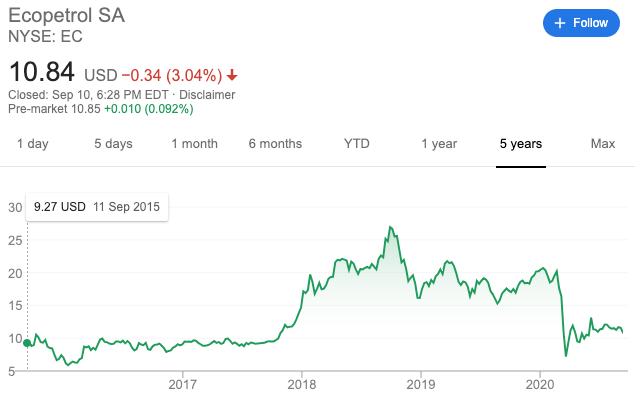
Fuente: Google

El análisis clásico de las series de tiempo parte de la idea de que cada valor de la variable es el resultado de la combinación de cuatro factores no observables que determinan su evolución.

Dichos factores son el movimiento a largo plazo o **tendencia**, que refleja la marcha general del fenómeno analizado; los movimientos a medio plazo o **variaciones
cíclicas**, que generalmente están relacionados con los ciclos económicos de prosperidad y recesión; las variaciones a corto plazo (trimestrales, mensuales, semanales,
diarias o de otra periodicidad) o **variaciones estacionales**, ocasionadas por causas periódicas, y finalmente los movimientos esporádicos o **variaciones accidentales o residuales** derivados de acontecimientos ocasionales.

**Nota:** las series temporales no siempre contienen los cuatro elementos sino que
pueden estar formadas sólo por alguno o algunos de ellos.

Un modelo clásico para una serie de tiempo, supone que una serie $y(t)$ puede ser expresada como la suma o producto de tres componentes: *tendencia*, *estacionalidad* y un término de *error aleatorio*.

Existen tres modelos de series de tiempo, que generalmente se aceptan como buenas aproximaciones a las verdaderas relaciones, entre los componentes de los datos observados.  Estos son:

* Aditivo: $y(t) = T(t) + E(t) + A(t)$
* Multiplicativo: $y(t) = T(t) \cdot E(t) \cdot A(t)$
* Mixto: $y(t) = T(t) \cdot E(t) + A(t)$

Donde:
* $y(t)$ serie observada
* $T(t)$ componente de tendencia
* $E(t)$ componente estacional
* $A(t)$ componente aleatoria (residual) el cual es muy común asumir que es un ruido blanco con media cero y varianza constante.

Un modelo aditivo, es adecuado, por ejemplo, cuando $E(t)$ no depende de otras componentes, como $T(t)$, sí por el contrario la estacionalidad varía con la tendencia, el modelo más adecuado es un modelo multiplicativo . Es claro que el modelo multiplicativo puede ser transformado en aditivo, tomando logaritmos.




##Análisis de la tendencia mediante el método de las medias móviles
Uno de los métodos más utilizados para aislar la tendencia es el de las medias móviles, que consiste en suavizar las fluctuaciones de la serie sustituyendo cada observación por el promedio de dicha observación y las más cercanas.

Para calcular la media móvil de las $n$ observaciones más cercanas en una serie de datos $y(t) = y_1, y_2, y_3, \ldots, y_t, \ldots, y_k$, usaremos la siguiente ecuación:

$$\bar{y_t} = \frac{\sum_{i=t-n}^{t}y_i}{n},\qquad y_{t-n} \geq y_1$$

Nº Observación | $y_t$ | $\bar{y_t}$
:--------------|:-----:|:----------:
1|$y_1$|
2|$y_2$|
$\vdots$|$\vdots$|
$n$|$y_n$|$\frac{y_1 + y_2 + \cdots  y_n}{n}$
$n+1$|$y_{n+1}$|$\frac{y_2 + y_3 + \cdots  y_{n+1}}{n}$
$\vdots$|$\vdots$|$\vdots$
$k$|$y_k$|$\frac{y_{k-n} + y_{k-n+1} + \cdots  y_k}{n}$


En este caso las primeras $n-1$ observaciones se pierden, debido a que no es posible hacer el cálculo de la media móvil para ellos.

##Análisis de la tendencia mediante el método de suavizamiento exponencial
El suavizamiento exponencial emplea un promedio ponderado de la serie de tiempo pasada como pronóstico.
En la práctica comenzamos haciendo que $F_1$, el primer valor de la serie de valores
uniformados, sea igual a $y_1$, que es el primer valor real de la serie. El modelo básico de
suavizamiento exponencial es el siguiente:

$$F_{t+1} = \alpha y_t + (1-\alpha)F_t$$

Donde:
* $F_{t+1}$ pronóstico de la serie de tiempo para el período $t+1$
* $y_t$ valor real de la serie de tiempo en el período t
* $F_t$ pronóstico de la serie de tiempo para el período $t$
* $\alpha$ constante de suavizamiento, $0 \leq \alpha \leq 1$

###Ejemplo medias móviles
Extraer la tendencia de la serie de ingresos (miles de euros) correspondientes a establecimientos turísticos en el periodo comprendido entre 1990 y 2003.

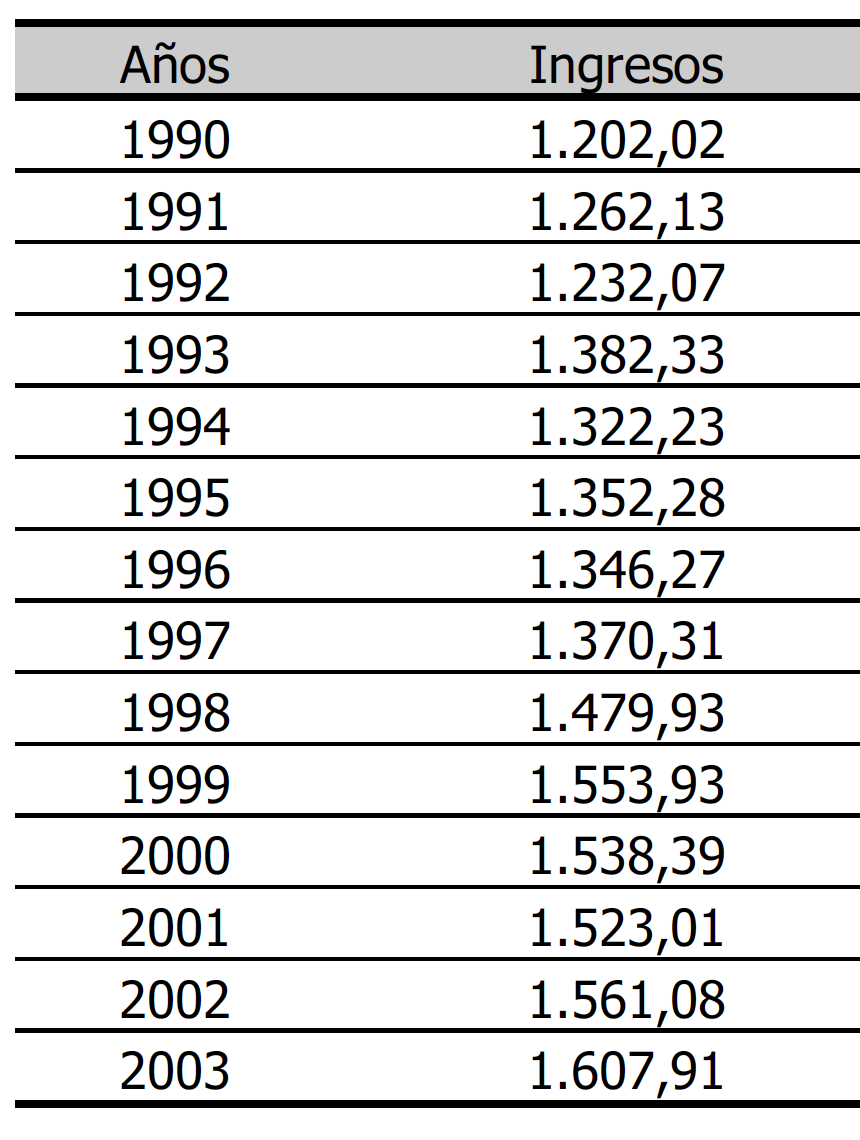

In [2]:
t = np.array(range(1990,2004))
ingresos = np.array([1202.02, 1262.13, 1232.07, 1382.33, 1322.23, 1352.28, 1346.27, 1370.31, 1479.93, 1553.93, 1538.39, 1523.01, 1561.08, 1607.91])

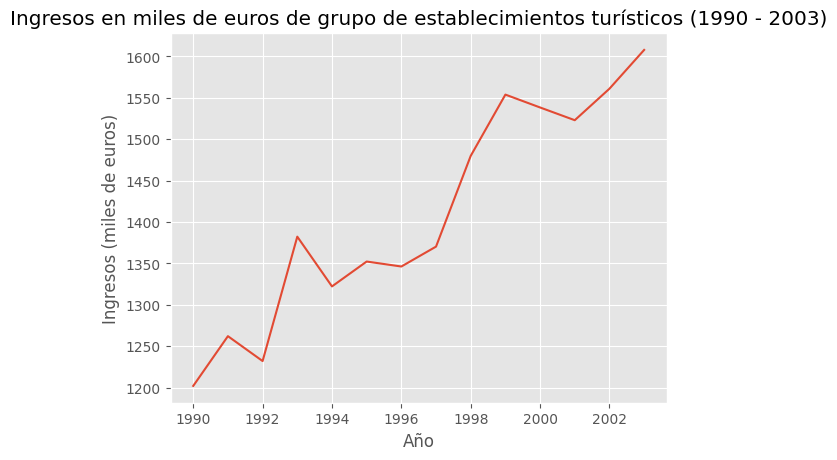

In [3]:
plt.plot(t,ingresos)
plt.title('Ingresos en miles de euros de grupo de establecimientos turísticos (1990 - 2003)')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de euros)')
plt.show()

In [13]:
# Hacer media móvil para n = 3
n = 3
k = len(ingresos)
mmovil = np.empty(k)
mmovil[:] = np.nan
ini = 0
for i in range(n-1,k):
  mmovil[i] = np.sum(ingresos[ini:i+1])/n
  ini += 1
mmovil

array([          nan,           nan, 1232.07333333, 1292.17666667,
       1312.21      , 1352.28      , 1340.26      , 1356.28666667,
       1398.83666667, 1468.05666667, 1524.08333333, 1538.44333333,
       1540.82666667, 1564.        ])

Haga el mismo proceso en su calculadora y verifique si los resultados son iguales.

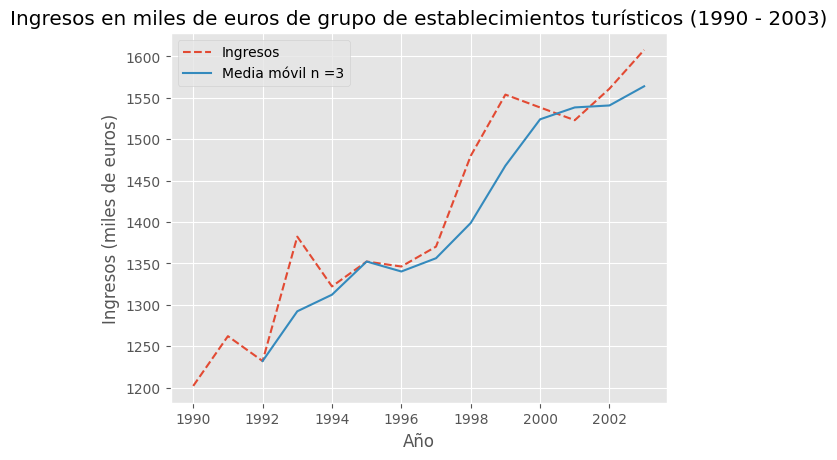

In [10]:
plt.plot(t,ingresos, '--', label='Ingresos')
plt.plot(t,mmovil, label='Media móvil n =3')
plt.title('Ingresos en miles de euros de grupo de establecimientos turísticos (1990 - 2003)')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de euros)')
plt.legend()
plt.show()

###Ejercicio medias móviles 1
Cree una función que reciba como argumentos la serie temporal de ingresos y el número $n$. A partir de esta función calcule la media móvil para $n = 4$ y haga un gráfico comparativo entre el valor de los ingresos, la media móvil $n=3$ y la media móvil $n=4$.

In [14]:
# Hacer media móvil para n = 4
n4 = 4
mmovil4 = np.empty(k)
mmovil4[:] = np.nan
ini = 0
for i in range(n4-1,k):
  mmovil4[i] = np.sum(ingresos[ini:i+1])/n4
  ini += 1
mmovil4



array([      nan,       nan,       nan, 1269.6375, 1299.69  , 1322.2275,
       1350.7775, 1347.7725, 1387.1975, 1437.61  , 1485.64  , 1523.815 ,
       1544.1025, 1557.5975])

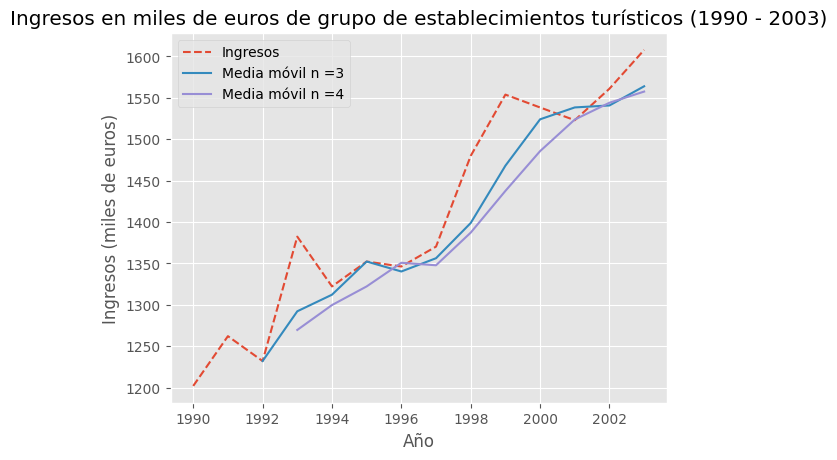

In [15]:
#Grafico valor de los ingresos, la media móvil  n=3  y la media móvil  n=4
plt.plot(t, ingresos, '--', label='Ingresos')
plt.plot(t, mmovil, label='Media móvil n =3')
plt.plot(t, mmovil4, label='Media móvil n =4')
plt.title('Ingresos en miles de euros de grupo de establecimientos turísticos (1990 - 2003)')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de euros)')
plt.legend()
plt.show()

La libreria de pandas tiene una función que hace el cálculo de la media móvil.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

In [16]:
df_ingresos = pd.DataFrame({'year':t,'ingresos':ingresos})
df_ingresos.set_index('year')
df_ingresos.head()

,year,ingresos
0,1990,1202.02
1,1991,1262.13
2,1992,1232.07
3,1993,1382.33
4,1994,1322.23


In [17]:
df_ingresos['mmovil'] = df_ingresos['ingresos'].rolling(3).mean()
df_ingresos.head()

,year,ingresos,mmovil
0,1990,1202.02,NaN
1,1991,1262.13,NaN
2,1992,1232.07,1232.073333
3,1993,1382.33,1292.176667
4,1994,1322.23,1312.210000


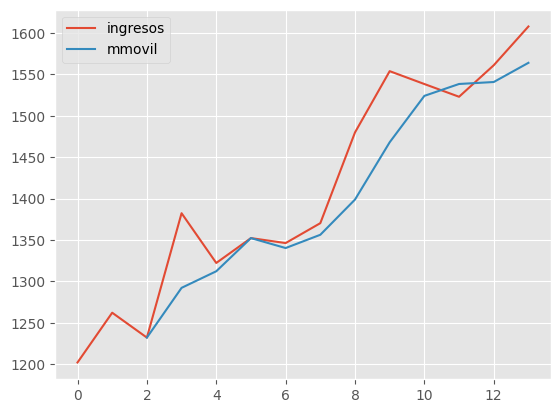

In [18]:
df_ingresos[['ingresos','mmovil']].plot();

##Estacionalidad de la serie de tiempo
La estimación de la estacionalidad no sólo se realiza con el fin de incorporarla al modelo para obtener predicciones, sino también con el fin de eliminarla de la serie para visualizar otras componentes como tendencia y componente irregular que se pueden confundir en las fluctuaciones estacionales.

De acuerdo con los modelos expuestos anteriormente la estacionalidad se puede representar:
* $y(t) - T(t) = E(t) + A(t)$
* $\frac{y(t)}{T(t)} = E(t).A(t)$
* $\frac{y(t)}{T(t)} = E(t) + \frac{A(t)}{T(t)}$

Si denotamos el periodo de la serie por $s$ entonces la componente estacional debe cumplir:
$$ E(t+s) = E(t)$$
Por tanto, para conocer
la componente estacional $E(t)$ es suficiente conocer $s$ de sus valores consecutivos (en el tiempo).

###Ejemplo estacionalidad 1
Encontrar la estacionalidad en los datos de los ingresos.

In [19]:
est = ingresos - mmovil
est

array([            nan,             nan, -3.33333333e-03,  9.01533333e+01,
        1.00200000e+01,  0.00000000e+00,  6.01000000e+00,  1.40233333e+01,
        8.10933333e+01,  8.58733333e+01,  1.43066667e+01, -1.54333333e+01,
        2.02533333e+01,  4.39100000e+01])

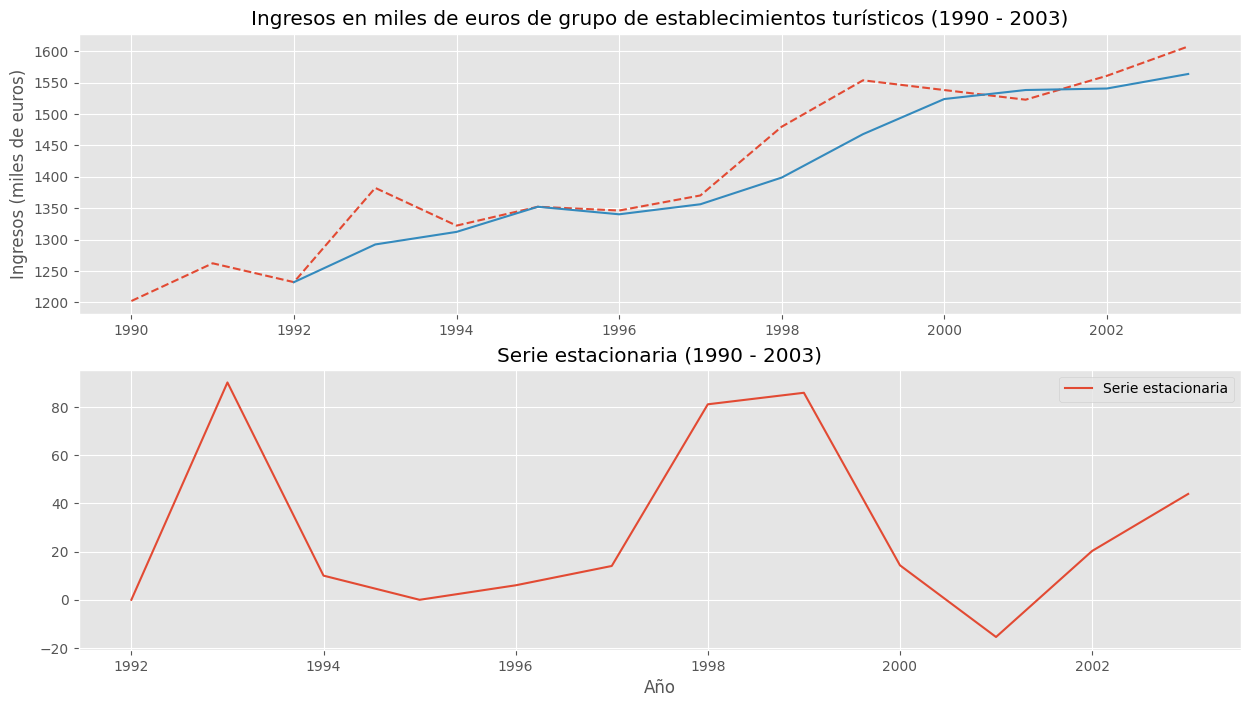

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(t,ingresos, '--', label='Ingresos')
plt.plot(t,mmovil, label='Media móvil n =3')
plt.title('Ingresos en miles de euros de grupo de establecimientos turísticos (1990 - 2003)')
plt.ylabel('Ingresos (miles de euros)')
plt.subplot(212)
plt.plot(t,est, '-',label='Serie estacionaria')
plt.title('Serie estacionaria (1990 - 2003)')
plt.xlabel('Año')
plt.legend()
plt.show()

###Ejercicio estacionalidad

In [21]:
!pip install pydataset
from pydataset import data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 43.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=290424d7c74aa4224535c1cfd1d4ec90bb710d1162302ea7845fb80254789b19
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


In [22]:
co2 = data('co2')
co2.head()

,time,co2
1,1959.000000,315.42
2,1959.083333,316.31
3,1959.166667,316.50
4,1959.250000,317.56
5,1959.333333,318.13


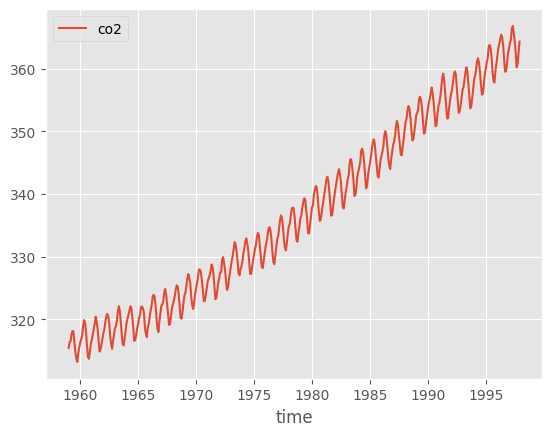

In [23]:
co2.plot(x='time');

Calcule la estacionalidad con $n = 30$. ($y(t) - T(t) = E(t) + A(t)$)

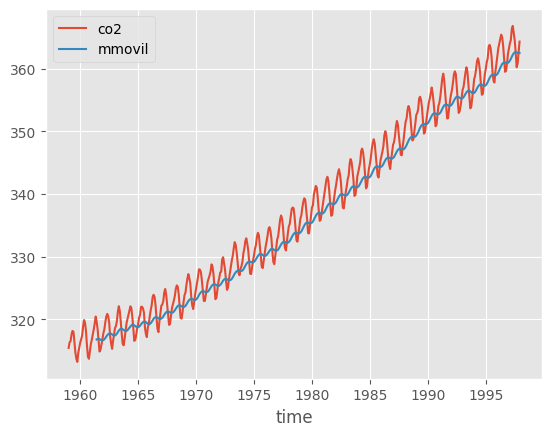

In [24]:
# Escriba su código aquí
n = 30
co2['mmovil'] = co2['co2'].rolling(n).mean()
co2.plot(x='time');

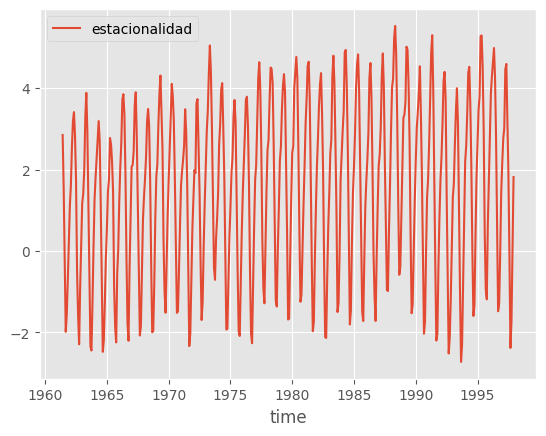

In [25]:
co2['estacionalidad'] = co2['co2'] - co2['mmovil']
co2[['time','estacionalidad']].plot(x='time');

Usando la libreria statsmodels para hacer la descomposición.

https://www.statsmodels.org/stable/index.html

In [27]:
import statsmodels.api as sm
descomposicion = sm.tsa.seasonal_decompose(co2['co2'],model='aditive',period=30)

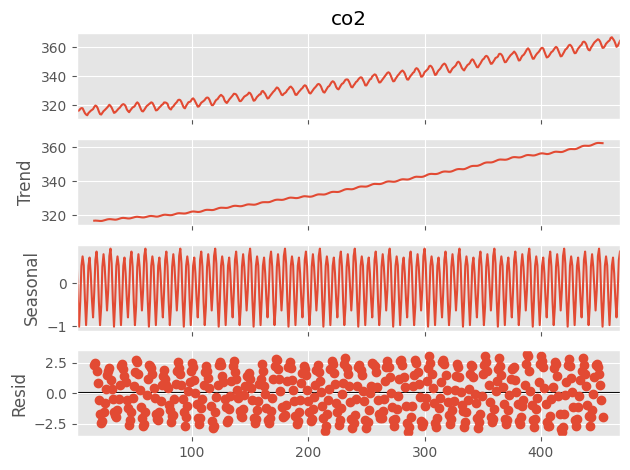

In [28]:
descomposicion.plot();

##Índices de variación estacional (IVE) y desestacionalización
La manera matemática de representar la estacionalidad es a tráves de los llamados índices de variación estacional (índices estacionales). Estos son usados para el modelo multiplicativo (en el modelo aditivo se llaman diferencias estacionales). Una forma de calcular estos índices de variación estacional es usando el método de la media móvil, que se conforma por los siguientes pasos:

1. **Se determina la serie de las medias móviles:** En una serie temporal (con observaciones mensuales, trimestrales, etc) se aplica el método de las medias móviles de período anual para determinar la tendencia.
2. **Se elimina la tendencia:** La tendencia se elimina dividiendo la serie original por la correspondiente media móvil.
$$ \frac{y(t)}{T(t)} = E(t)A(t)$$
3. **Se elimina la componente aleatoria:** Se calculan los promedios (por meses, trimestres, etc), puesto que al promediar se reparte la influencia de dicha componente. Al eliminar la componente aleatoria se obtienen los *índices brutos de variación estacional* $IBVE_i$, $i = 1,2,\ldots,k$.
4. **Cálculo del Índice de Variación Estacional:** Una vez obtenidos los índices brutos de variación estacional se calculan los índices de variación estacional IVE teniendo en cuenta que **la suma de los $k$ índices debe ser igual a $k$ ($k*100$ en porcentaje)**. Se obtienen al calcular la media aritmética de los valores obtenidos en el punto anterior expresando cada uno de ellos como porcentaje respecto a la media.

**Nota:** Habrá tantos índices de variación estacional como momentos de observación anual, es decir, si las observaciones son mensuales habrá doce ínices, si son trimestrales cuatro ñindices, etc.

En el modelo aditivo los pasos son:
1. Se determina la tendencia usando el método de medias móviles.
2. Se restan los valores de la serie original con la correspondiente a la tendencia.
$$ y(t) - T(t) = E(t)  A(t)$$
3. Se elimina la componente aleatoria promediando los datos obtenidos en el punto 2.
4. Se calcula la media aritmética de los valores obtenidos en el punto 3.
5. Se sustrae a cada valor obtenido en el punto 3 la media aritmética obtenida en el punto 4, y estas serían las llamadas *diferencias estacionales*

En algunas ocasiones interesa observar el comportamiento general de una serie cronológica sin tener en cuenta la componente estacional, este proceso se conoce como **desestacionalizar**.

En el modelo multiplicativo, la desestacionalización se obtiene dividiendo cada observación de la serie original por el correspondiente índice de variación estacional.

En el modelo aditivo, para desestacionalizar ser resta a cada valor observado de la serie original la correspondiente diferencia estacional.

###Ejemplo índice de variación estacional y desestacionalización.

En la siguiente tabla se muestran las ventas trimestrales de una empresa en millones de euros. Se requiere desestacionalizar la serie por el método de medias móviles.


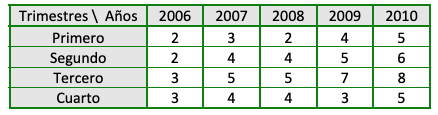

**1** Calcular la tendencia por el método de las medias móviles de tamaño 4.

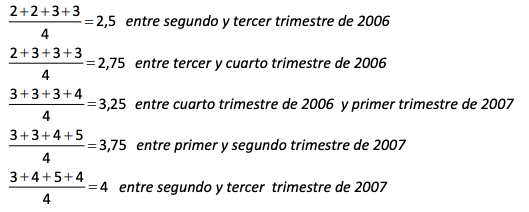

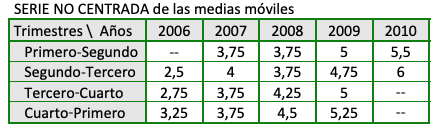

Como la serie es no centrada se debe calcular la media aritmética de cada dos observaciones sucesivas, de manera que se logre centrar.

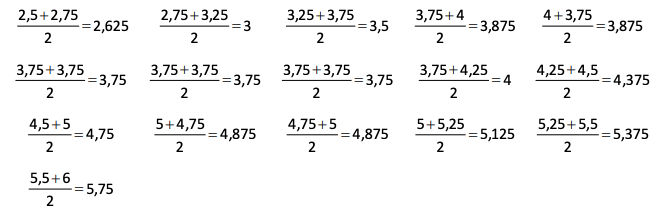

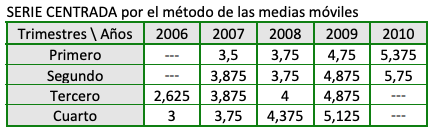

La linea de tendencia empezaría en el tercer trimestre de 2006 y terminaría en el segundo trimestre de 2010.

**2** Dividir la componente de la tendencia con la serie original.
$$ y(t) - T(t) = E(t)  A(t)$$

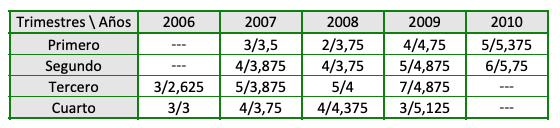

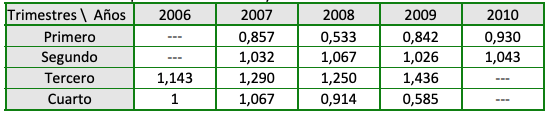

**3** Eliminar la componente aleatoria con el cálculo de las medias aritméticas trimestrales, es decir la media aritmética de cada fila de la tabla anterior.

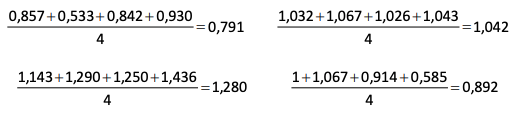

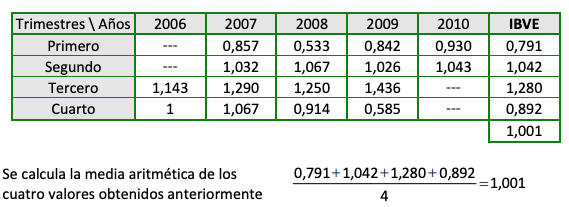

**4** Se calculan los índices de variación estacional (IVE), expresandolos en forma de porcentaje sobre la media anual.

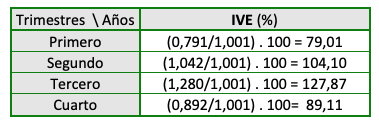

Sobre un nivel medio de ventas, la influencia de la variación estacional produce:
* 1er trimestre ($79,01 - 100 = -20,99$), un descenso de ventas del $20,99 \%$.
* 2do trimestre ($104,10 - 100 = 4,10$), un aumento de ventas del $4,10 \%$.
* 3er trimestre ($127,87 - 100 = 27,87$), un aumento de ventas del $27,87 \%$.
* 4to trimestre ($89,11 - 100 = -10,89$), un descenso de ventas del $10,89 \%$.

Para hacer la desestacionalización se debe dividir cada valor de la serie original por cada ínidice de variación estacional correspondiente:

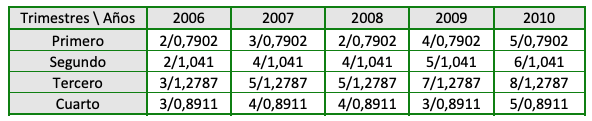

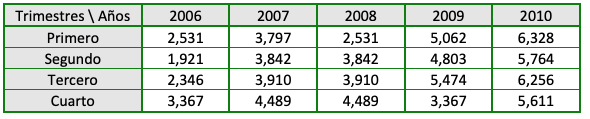

###Ejercicio índice de variación estacional y desestacionalización.
A Partir de los datos trimestrales de emisión de CO2 en el perido 1959 - 1997, realice la desestacionalización de la serie.

In [29]:
# función para transformar los datos a valores trimestrales.
def get_trimestre(t):
  dt = t - int(t)
  if dt <= 0.25:
    trimestre = 1
  elif dt > 0.25 and dt <= 0.5:
    trimestre = 2
  elif dt > 0.5 and dt <= 0.75:
    trimestre = 3
  else:
    trimestre = 4
  return trimestre

co2 = data('co2')
co2['year'] = co2['time'].apply(lambda t: int(t))
co2['trimestre'] = co2['time'].apply(get_trimestre)
co2_trim = co2[['year','trimestre','co2']].groupby(['year','trimestre'],\
                                        as_index=False).mean()

In [30]:
co2_trim.tail()

,year,trimestre,co2
151,1996,4,360.943333
152,1997,1,363.966667
153,1997,2,366.306667
154,1997,3,362.443333
155,1997,4,362.553333


Encuentren la tendencia y generen la serie con la estacionalidad y la componente aleatoria.

<Axes: >

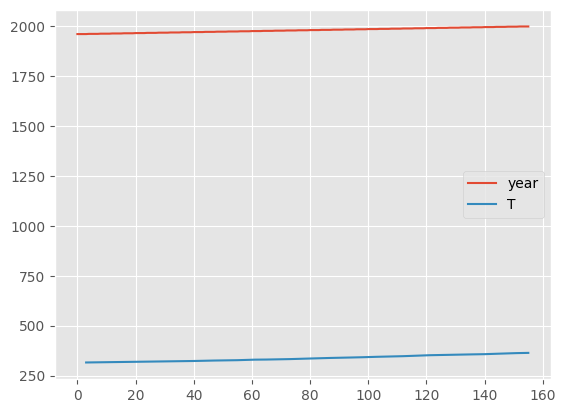

In [31]:
# Escriba su código aquí
co2_trim["T"] = co2_trim["co2"].rolling(4) .mean()
co2_trim[["year" , "T"]].plot()

<Axes: xlabel='year'>

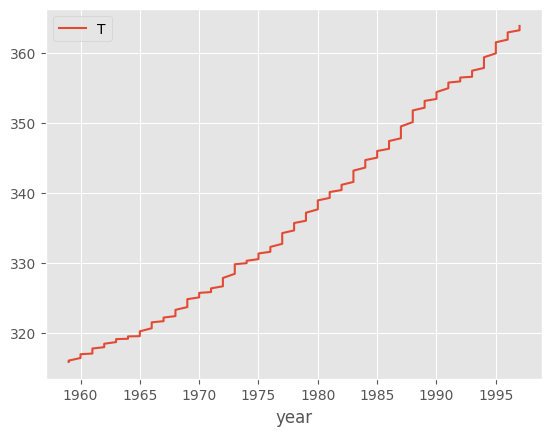

In [32]:
co2_trim["T"] = co2_trim["co2"].rolling(4, center=True) .mean()
co2_trim[["year", "T"]].plot(x="year")

In [33]:
co2["T"] = co2_trim["co2"].rolling(4, center=True).mean()
co2_trim["EA"] = co2_trim["co2"]/co2_trim["T"]

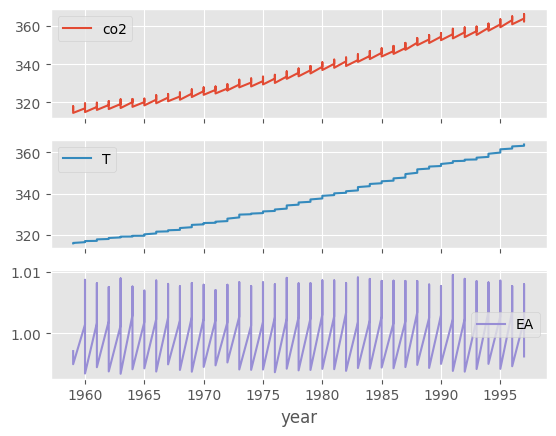

In [34]:
co2_trim[["year", "co2" , "T" , "EA"]].plot(x="year", subplots=True);

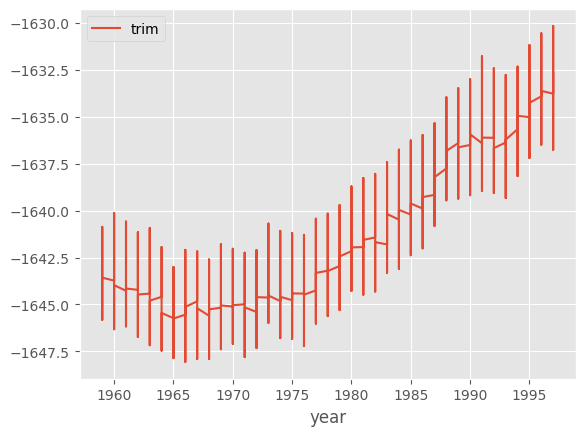

In [35]:
co2['trim'] = co2['co2'] - co2['year']
co2[['year','trim']].plot(x='year');

Calcule los índices IBVE e IVE

In [36]:
# Escriba su código aquí
co2_trim.head(10)

,year,trimestre,co2,T,EA
0,1959,1,316.076667,NaN,NaN
1,1959,2,317.896667,NaN,NaN
2,1959,3,314.906667,315.825833,0.997090
3,1959,4,314.423333,316.015000,0.994963
4,1960,1,316.833333,316.388333,1.001406
5,1960,2,319.390000,316.640833,1.008682
6,1960,3,315.916667,316.747500,0.997377
7,1960,4,314.850000,316.926667,0.993447
8,1961,1,317.550000,317.024167,1.001659
9,1961,2,319.780000,317.201667,1.008128


In [37]:
ibve = co2_trim[["trimestre","EA"]].groupby("trimestre",as_index=False).mean()
ibve

,trimestre,EA
0,1,1.002373
1,2,1.008219
2,3,0.997002
3,4,0.994252


Encuentre la serie desestacionada.

In [51]:
# Serie desestacionada
#IBVE e IVE
ibve = co2_trim[["trimestre","EA"]].groupby("trimestre",as_index=False).mean()
ibve_mean = ibve["EA"].mean()
ibve["IVE"] = ibve["EA"]/ibve_mean
ibve.rename(columns={"EA":"IBVE"},inplace=True)
ibve

#Serie desestacionada
co2_trim["desestacional"] = co2_trim["co2"]/ibve["IVE"]
co2_trim.head()



,year,trimestre,co2,T,EA,desestacional,regresion
0,1959,1,316.076667,NaN,NaN,315.473845,NaN
1,1959,2,317.896667,NaN,NaN,315.450685,NaN
2,1959,3,314.906667,315.825833,0.997090,315.999476,NaN
3,1959,4,314.423333,316.015000,0.994963,316.386993,NaN
4,1960,1,316.833333,316.388333,1.001406,NaN,NaN


In [42]:
ibve = co2_trim[['trimestre','EA']].groupby('trimestre',as_index=False).mean()
ibve.rename(columns={'EA':'ibve'}, inplace=True)
ibve_mean = ibve['ibve'].mean()
ibve['ive'] = ibve['ibve']/ibve_mean
ibve

,trimestre,ibve,ive
0,1,1.002373,1.001911
1,2,1.008219,1.007754
2,3,0.997002,0.996542
3,4,0.994252,0.993793


In [55]:
# Escriba su código aquí


ibve = co2_trim[['trimestre', 'EA']].groupby('trimestre', as_index=False).mean()
ibve.rename(columns={'EA': 'ibve'}, inplace=True)


ibve_mean = ibve['ibve'].mean()
ibve['ive'] = ibve['ibve'] / ibve_mean

print("IBVE e IVE:")
print(ibve)

def desestacionar_serie(row, ive):
    trimestre = row['trimestre']
    co2_value = row['co2']
    return co2_value / ive[trimestre - 1]

# Aplicar la desestacionalización
co2_trim['desestacional'] = co2_trim.apply(lambda row: desestacionar_serie(row, ibve['ive']), axis=1)

print("\nSerie desestacionalizada:")
print(co2_trim[['year', 'trimestre', 'co2', 'desestacional']])



IBVE e IVE:
   trimestre      ibve       ive
0          1  1.002373  1.001911
1          2  1.008219  1.007754
2          3  0.997002  0.996542
3          4  0.994252  0.993793

Serie desestacionalizada:
     year  trimestre         co2  desestacional
0    1959          1  316.076667     315.473845
1    1959          2  317.896667     315.450685
2    1959          3  314.906667     315.999476
3    1959          4  314.423333     316.386993
4    1960          1  316.833333     316.229068
5    1960          2  319.390000     316.932528
6    1960          3  315.916667     317.012981
7    1960          4  314.850000     316.816324
8    1961          1  317.550000     316.944368
9    1961          2  319.780000     317.319528
10   1961          3  316.626667     317.725445
11   1961          4  315.983333     317.956735
12   1962          1  318.570000     317.962423
13   1962          2  320.573333     318.106757
14   1962          3  317.603333     318.705501
15   1962          4  316.44

Aplique el modelo de regresión lineal para predecir el valor de la serie en el primer trimestre de 1998.

In [56]:
# Escriba su código aquí
y = np.array(co2_trim["desestacional"])
x = np.array(range(0,len(y)))
regresion = stats.linregress(x,y)
b = regresion.slope #y = a + bx
a = regresion.intercept
print(f"pendiente: {b}")
print(f"intercepto: {a}")
yrl = a + b*x
co2_trim["regresion"] = yrl

pendiente: 0.327621479275147
intercepto: 311.6642866583444


In [57]:
# 3. Modelo de regresión lineal para predecir el primer trimestre de 1998
y = np.array(co2_trim['desestacional'])
x = np.array(range(len(y)))

# Ajuste del modelo de regresión lineal
regresion = stats.linregress(x, y)
b = regresion.slope  # Pendiente
a = regresion.intercept  # Intercepto

print(f"\nPendiente: {b}")
print(f"Intercepto: {a}")


Pendiente: 0.327621479275147
Intercepto: 311.6642866583444


Realice la gráfica de la regresión lineal

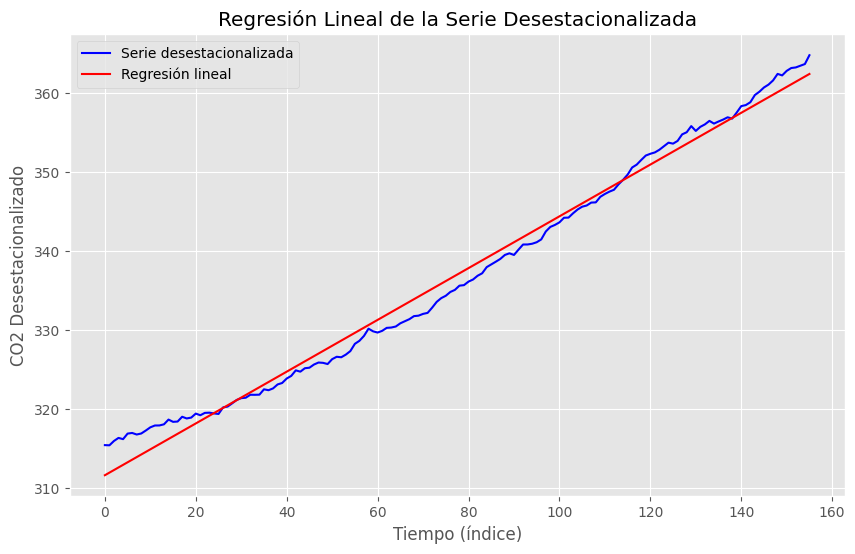

In [62]:
# Escriba su código aquí
plt.figure(figsize=(10, 6))
plt.plot(x, y,color = 'blue', label='Serie desestacionalizada')
plt.plot(x, co2_trim['regresion'], color='red', label='Regresión lineal')
plt.xlabel('Tiempo (índice)')
plt.ylabel('CO2 Desestacionalizado')
plt.title('Regresión Lineal de la Serie Desestacionalizada')
plt.legend()
plt.grid(True)
plt.show()

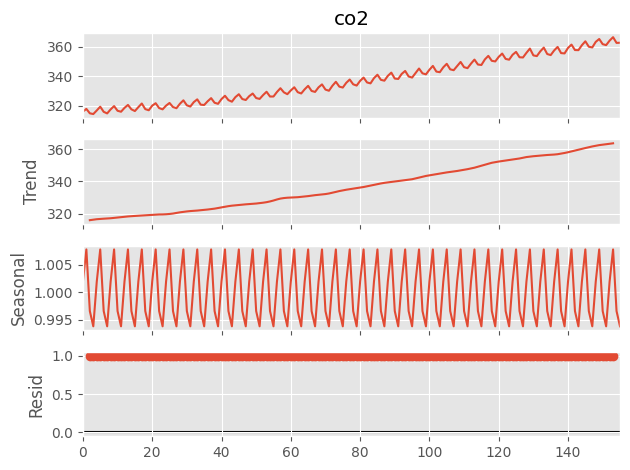

In [64]:
import statsmodels.api as sm
descomposicion = sm.tsa.seasonal_decompose(co2_trim['co2'],model='multiplicative',period=4)
descomposicion.plot();

##Modelo ARIMA
[ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) es una abreviatura que representa AutoRegressive Incorporated Moving Normal. Es el resultado de unificar dos modelos:
* *AR* (Autoregresivo): El modelo autoregresivo establece que el valor actual de la serie de tiempo es
una regresión lineal que depende de los valores anteriores y de un término de
*ruido* estocástico.
$$y_t = c + \sum_{i=1}^{p} \varphi_ix_{t-i} + \epsilon_t$$
$p$ es el orden del modelo, $\varphi_i$ son los parametros de ajuste y $\epsilon_t$ es el ruido. Los efectos del término de ruido al tiempo t contribuyen infinitamente lejos en
el futuro, aunque con un efecto decreciente.
* *MA* (Medias móviles): El modelo de media móvil (moving average), en cambio, modela una serie de
tiempo como una media móvil sobre los términos de ruido.
$$y_t = c + \epsilon_t + \sum_{i=1}^{q} \theta_i\epsilon_{t-i} $$
$q$ es el orden del modelo y $\epsilon_t$ es el ruido actual. En cierto sentido, dice que el valor actual de la serie de tiempo depende
solamente de un promedio pesado de los términos de ruido recientes.

**Box $\&$ Jenkins** establecieron que para obtener un modelo ARIMA($p$,$q$,$d$) se deben seguir estos tres pasos:

1. Diferenciar la serie (i.e. tomando las diferencias entre valores vecinos) d veces
hasta que la serie sea aproximadamente estacionaria (e.g. Dickey­Fuller).
2. Determinar los órdenes p y q de las componentes AR(p) y MA(q) usando las
funciones de autocorrelación y autocorrelación parcial.
3. Finalmente, ajustar los parámetros de los modelos AR y MA hasta satisfacer un
criterio de calidad de ajuste (e.g. AIC). Esto es altamente **no trivial**.

###Ejemplo uso de la función ARIMA en python


In [68]:
# Creando una serie de tiempo de las acciones de WFT desde yahoo finance
#dr.data.get_data_yahoo(Activo, start=FechaInicio, end=FechaFinal)
from datetime import date
#
Activo = 'AAPL'
FechaInicio = '2024-01-01'
FechaFinal = '2024-06-30'
apple = yf.download(Activo, start=FechaInicio, end=FechaFinal)
#apple = dr.data.get_data_yahoo(Activo, start=FechaInicio, end=FechaFinal)
apple.index = apple.index.to_period('D')
apple.head(5)

[*********************100%***********************]  1 of 1 completed
<ipython-input-68-6b49cbacb4d0>:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  apple.index = apple.index.to_period('D')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-01-02,184.734970,185.639999,188.440002,183.889999,187.149994,82488700
2024-01-03,183.351746,184.250000,185.880005,183.429993,184.220001,58414500
2024-01-04,181.023163,181.910004,183.089996,180.880005,182.149994,71983600
2024-01-05,180.296722,181.179993,182.759995,180.169998,181.990005,62303300
2024-01-08,184.655365,185.559998,185.600006,181.500000,182.089996,59144500


In [66]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas as pd
from datetime import date

# Creando una serie de tiempo de las acciones de WFT desde yahoo finance
#dr.data.get_data_yahoo(Activo, start=FechaInicio, end=FechaFinal)
Activo = 'AAPL'
FechaInicio = '01-01-2019'
FechaFinal = '31-12-2019'

# Usando yfinance para obtener los datos
apple = yf.download(Activo, start=FechaInicio, end=FechaFinal)

# Convertir el índice a período 'D'
apple.index = apple.index.to_period('D')

apple.head(5)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.48
    Uninstalling yfinance-0.2.48:
      Successfully uninstalled yfinance-0.2.48


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: ValueError("time data '31-12-2019' does not match format '%Y-%m-%d'")
<ipython-input-66-8263d0384a7b>:16: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  apple.index = apple.index.to_period('D')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,


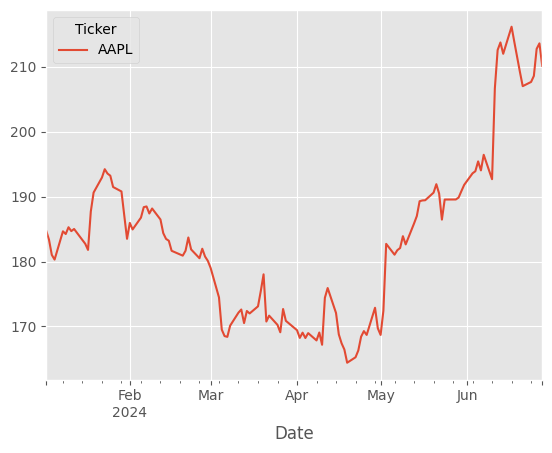

In [69]:
apple['Adj Close'].plot();

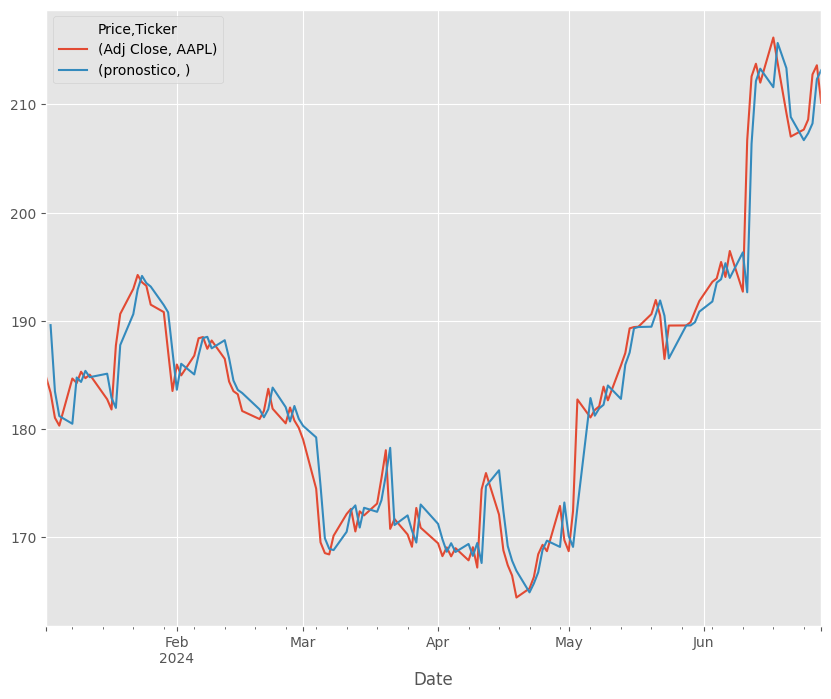

In [72]:
# Import the correct ARIMA class
from statsmodels.tsa.arima.model import ARIMA

# ... (rest of your code)

# Instantiate the ARIMA model using the updated class
modelo = ARIMA(apple['Adj Close'].iloc[1:], order=(1,0,0))
# Remove 'disp' and 'trend' arguments from fit() method
resultados = modelo.fit()
apple['pronostico'] = resultados.fittedvalues
plot = apple[['Adj Close', 'pronostico']].plot(figsize=(10, 8));